In [1]:
import functools
import os
import pickle
import random

import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.formula.api as smf


@functools.wraps(smf.ols)
def lm(*args, **kwargs):
    return smf.ols(*args, **kwargs).fit()

In [2]:
os.chdir("../../data/cleaned_data")

In [6]:
anime = pd.read_csv("anime.csv")
anime = anime[["anime_id", "title", "type"]]

In [7]:
correlations = pickle.load(open("../processed_data/item_correlations.pkl", "rb"))

In [85]:
def get_similar_shows(anime_id):
    correlations["similarity"] = correlations["corr"].abs()
    return (
        correlations.xs(anime_id, level="anime_id_x")
        .loc[lambda x: x.index.get_level_values("anime_id_y") != anime_id]
        .merge(anime, left_on="anime_id_y", right_on="anime_id")
        .sort_values(by="similarity", ascending=False)
    )

In [86]:
anime.loc[lambda x: x['title'] == 'Prison School']

,anime_id,title,type
10451,30240,Prison School,TV


In [97]:
anime_ids = [30831]

In [98]:
pd.set_option("display.max_rows", 500)
for anime_id in anime_ids:
    display(anime.set_index("anime_id").loc[[anime_id]])
    similar_shows = get_similar_shows(anime_id)
    display(similar_shows[:16])

,title,type
anime_id,,
30831,Kono Subarashii Sekai ni Shukufuku wo!,TV


,corr,corr_var,size,similarity,anime_id,title,type
13376,0.472092,0.000016,36834,0.472092,32937,Kono Subarashii Sekai ni Shukufuku wo! 2,TV
13375,0.289911,0.000051,16543,0.289911,32380,Kono Subarashii Sekai ni Shukufuku wo! OVA,OVA
13374,0.212557,0.000103,8895,0.212557,34626,Kono Subarashii Sekai ni Shukufuku wo! 2 OVA,OVA
13373,0.128068,0.000040,24479,0.128068,33206,Kobayashi-san Chi no Maid Dragon,TV
13372,0.118024,0.000024,40065,0.118024,31240,Re:Zero kara Hajimeru Isekai Seikatsu,TV
13371,0.116248,0.000023,42810,0.116248,30276,One Punch Man,TV
13370,0.108627,0.000028,35322,0.108627,15809,Hataraku Maou-sama!,TV
13369,0.104440,0.000066,14796,0.104440,33731,Gabriel DropOut,TV
13368,0.103187,0.000023,43404,0.103187,19815,No Game No Life,TV
13367,0.101987,0.000039,24945,0.101987,32182,Mob Psycho 100,TV


In [99]:
user = pickle.load(open("../recommendations/taapaye/user_anime_list.pkl", "rb"))

In [100]:
related_df = pickle.load(open("../processed_data/related_anime_graph.pkl", "rb"))

In [101]:
from tqdm import tqdm
scores = []
for k in tqdm(range(len(similar_shows))):
    combined = similar_shows[:k].merge(user, on='anime_id')
    scores.append((combined['corr'] * combined['score']).sum() / combined['corr'].abs().sum())

  0%|          | 0/13377 [00:00<?, ?it/s]<ipython-input-101-14492184fe13>:5: RuntimeWarning: invalid value encountered in double_scalars
  scores.append((combined['corr'] * combined['score']).sum() / combined['corr'].abs().sum())
100%|██████████| 13377/13377 [00:59<00:00, 225.74it/s]


<AxesSubplot:>

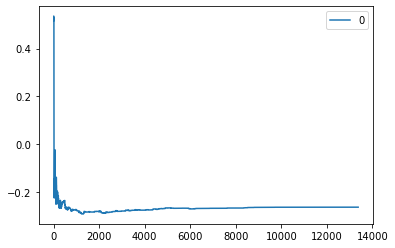

In [102]:
pd.DataFrame(scores).plot()

In [38]:
user

,username,anime_id,score,score_var
0,taapaye,1,0.069825,1.812764
1,taapaye,20,-0.775816,2.073848
2,taapaye,21,-1.705130,2.224881
3,taapaye,30,0.531055,2.199041
4,taapaye,32,0.398171,2.255429
5,taapaye,47,-2.231937,2.033711
6,taapaye,76,0.748337,1.677981
7,taapaye,77,-0.398548,1.562192
8,taapaye,82,0.973720,1.935091
9,taapaye,114,1.543944,1.959282


In [34]:
similar = get_similar_shows(anime_id)[:256]

In [35]:
comp = test.merge(similar, on="anime_id")

In [36]:
comp["contrib"] = comp["normalized_score"] * comp["corr"] / comp["corr"].abs().sum()

In [37]:
comp = (
    comp.loc[lambda x: x["corr"] > 0]
    .sort_values(by="similarity", ascending=False)[
        ["title", "contrib", "corr", "normalized_score", "my_score", "anime_id"]
    ]
    .copy()
)
comp["cumsum"] = comp["contrib"].cumsum()

In [38]:
0.070865 + 0.069480 + 0.054158 + 0.046000

0.24050299999999997

In [39]:
comp

,title,contrib,corr,normalized_score,my_score,anime_id,cumsum
1,New Game!,0.034415,0.090043,0.362024,7,31953,0.034415
11,Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou,0.303191,0.083468,3.440637,10,34445,0.337606
16,Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou,0.227511,0.083411,2.583552,9,34284,0.565117
8,Yuuki Yuuna wa Yuusha de Aru,0.194503,0.068762,2.679269,9,25519,0.759619
12,Mahou Shoujo Ikusei Keikaku,0.007366,0.061818,0.112868,6,33003,0.766986
4,Kobayashi-san Chi no Maid Dragon,-0.067172,0.060300,-1.055140,6,33206,0.699814
7,Gakkougurashi!,0.093197,0.058056,1.520541,8,24765,0.793011
14,Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#...,-0.019148,0.052633,-0.344586,7,10153,0.773863
3,Sakura Trick,0.051162,0.047932,1.011028,7,20047,0.825025
2,Love Live! School Idol Project,0.025434,0.047350,0.508795,7,15051,0.850459


In [16]:
comp.loc[lambda x: x["corr"] < 0].sort_values(by="similarity", ascending=False)

KeyError: 'similarity'

In [ ]:
test.merge(similar, on="anime_id")["corr"].abs().sum()

In [ ]:
x["corr"].abs().sum() ** 2, (x["corr"] ** 2).sum()

In [ ]:
(x["corr"].abs().sum() ** 2) / (x["corr"].abs().sum() ** 2 - (x["corr"] ** 2).sum())

In [ ]:
a = pickle.load(open("user_profiles/ExtraUserAnimeLists.pkl", "rb"))

In [ ]:
a.loc[lambda x: x['anime_id'].isin([10153, 24629, 17549, 77]), 'my_score'] -= 1

In [ ]:
a.loc[lambda x: x['anime_id'].isin([10153, 24629, 17549, 77])]

In [ ]:
a

In [ ]:
a.to_pickle("user_profiles/ExtraUserAnimeLists.pkl")